# *Homework no.7*
## **Exercise:**
-Evaluate the Mann-Whitney U test for DIC and temperatura. Create boxplots and violin plots for these analyses.

In [3]:
def import_csv(file):
    import pandas as pd
    return pd.read_csv(file)
path = "../Curso_Python_Mayte/data/Terminos_lagoon_TA_DIC_2023_RawData.csv"
CO2Data = import_csv(path)

In [4]:
CO2Data.head()

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


In [5]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    """
    Performs the Mann-Whitney U test and prints U statistic, p-value, and result.
    """
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

In [6]:
# Filter the DIC data by season
dic_dry = CO2Data.loc[CO2Data["season"] == "Dry", "dic_micromol_kg"]
dic_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "dic_micromol_kg"]

# Perform the Mann-Whitney U test for DIC between dry and rainy seasons
mann_whitney_test(dic_dry, dic_rainy)

U statistic = 1942.5
p-value = 1.1746695070093673e-06
The difference is statistically significant.


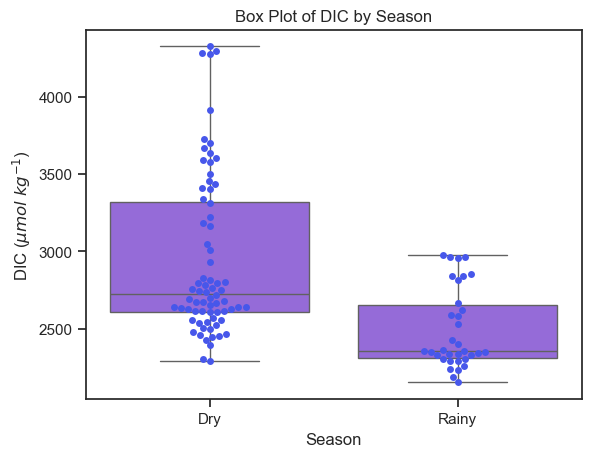

In [8]:
# Plot the box plot of DIC by season
import seaborn as sns
import matplotlib.pyplot as plt

my_colors = ["#9159EA", "#4757ea", "#259773"]
sns.set(font_scale=1, style="ticks", palette= my_colors)

# Create a box plot
sns.boxplot(x='season', y='dic_micromol_kg', data=CO2Data)
sns.swarmplot(x='season', y='dic_micromol_kg', data=CO2Data)
sns.despine(top=False,right=False)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('DIC ($\mu mol \; kg^{-1}$)')
plt.title('Box Plot of DIC by Season')

# Show the plot
plt.show()

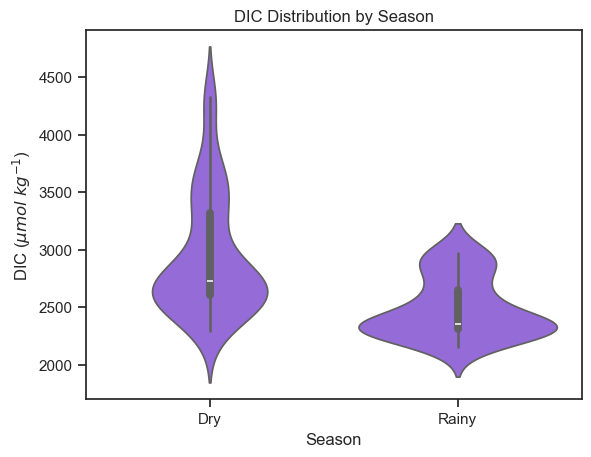

In [9]:
# Violin plot of DIC by season
sns.violinplot(x='season', y='dic_micromol_kg', data=CO2Data)

plt.title('DIC Distribution by Season')
plt.xlabel('Season')
plt.ylabel('DIC ($\mu mol \; kg^{-1}$)')
plt.show()

In [10]:
# Filter the Temperature data by season
temp_dry = CO2Data.loc[CO2Data["season"] == "Dry", "temp_c"]
temp_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "temp_c"]

# Perform the Mann-Whitney U test for DIC between dry and rainy seasons
mann_whitney_test(temp_dry, temp_rainy)

U statistic = 551.0
p-value = 5.317160670684041e-06
The difference is statistically significant.


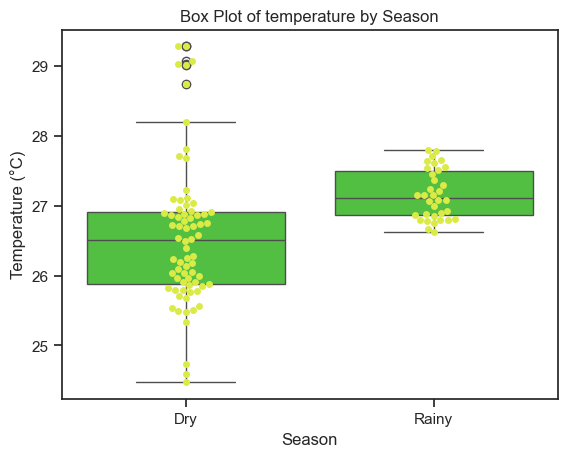

In [11]:
# Plot the box plot of Temperature by season
my_colors = ["#42D42E", "#daea47", "#076044"]
sns.set(font_scale=1, style="ticks", palette= my_colors)
# Create a box plot
sns.boxplot(x='season', y='temp_c', data=CO2Data)
sns.swarmplot(x='season', y='temp_c', data=CO2Data)
sns.despine(top=False,right=False)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of temperature by Season')

# Show the plot
plt.show()

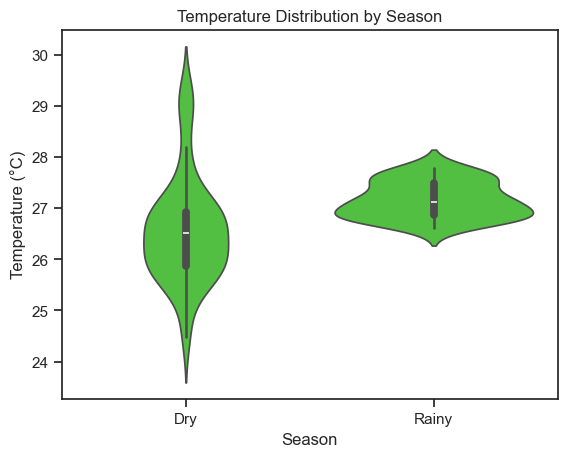

In [12]:
# Violin plot of Temperature by season
sns.violinplot(x='season', y='temp_c', data=CO2Data)

plt.title('Temperature Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()